# Heat equation

## libs

In [1]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt

from matplotlib import animation

## initialization

In [2]:
LENGTH = 0.5
INITIAL = 0
BOUND = 1

NUMBER_X = 51

In [3]:
step_x = LENGTH * 2 / (NUMBER_X - 1)

## building matrices

In [6]:
stiffness_matrix = np.eye(NUMBER_X) - np.roll(np.eye(NUMBER_X),1,axis=1) - np.roll(np.eye(NUMBER_X),1,axis=0)
stiffness_matrix[0,-1] = stiffness_matrix[-1,0] = 0

stiffness_matrix *= stiff_array / step_x
stiffness_matrix[int(NUMBER_X/2) + 1, int(NUMBER_X/2)] = stiffness_matrix[int(NUMBER_X/2), int(NUMBER_X/2) + 1]

for i in range(NUMBER_X-1):
    stiffness_matrix[i,i] =  (stiff_array[i] + stiff_array[i+1]) / step_x

In [7]:
source_matrix = np.ones_like(axis)

for i in range(NUMBER_X-1):
    source_matrix[i] = step_x * (source_array[i] + source_array[i+1]) / 2

## initial condition

In [8]:
source_matrix[0] = INITIAL
source_matrix[-1] = BOUND

stiffness_matrix[0,0] = stiffness_matrix[-1,-1] = 1
stiffness_matrix[0,1:] = stiffness_matrix[-1,:-1] = 0

## main procedures

In [9]:
U = sc.solve(stiffness_matrix, source_matrix)
U_exact = calculate_exact_solution(axis)

## results

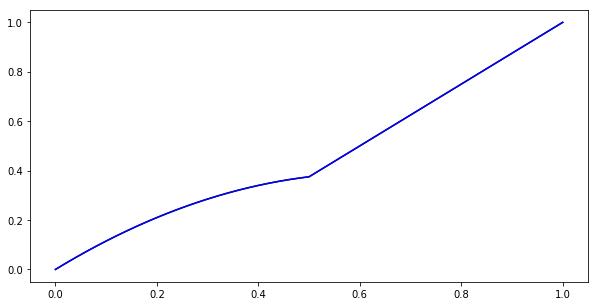

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(axis, U, c='black',)
ax.plot(axis, U_exact, c='blue')

In [11]:
(abs(U-U_exact)).max()

3.481659405224491e-15